In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
import scipy.interpolate
import numpy
import glob

In [2]:
r_beam, wavelength, r_mean, r_meadian, r_std, counts = np.loadtxt("/HDD/fvaracar/Geant_082024/OMSim_local/OMSim/OMSim/build/step4.dat", unpack=1)

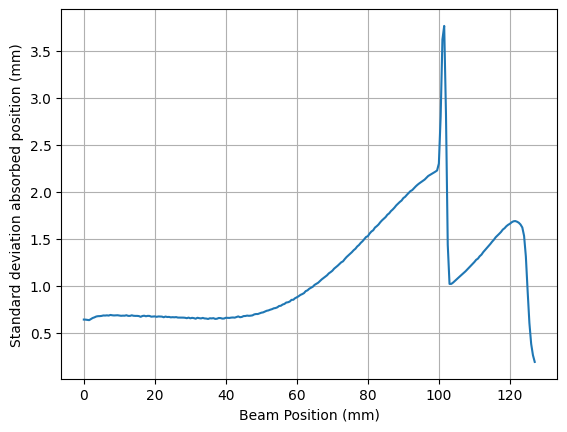

In [3]:
# The standard deviation of the position should be approximately the beam width. At the edges things go crazy due to total internal reflections
plt.figure()
plt.plot(r_beam[counts>10], r_std[counts>10])
plt.ylabel("Standard deviation absorbed position (mm)")
plt.xlabel("Beam Position (mm)")
plt.grid()

/data/fvaracar/python_envs/jupyter_env/lib/python3.10/site-packages/numpy/lib/_polynomial_impl.py:664: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/data/fvaracar/python_envs/jupyter_env/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_1205343/26218785.py:12: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(r_beam[mask],r_mean[mask], 140)
/tmp/ipykernel_1205343/26218785.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r_beam[mask],r_mean[mask]/r_beam[mask], '.')
/tmp/ipykernel_1205343/26218785.py:17: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r_beam[mask], p(r_beam[mask])/r_beam[mask], label = "fit")


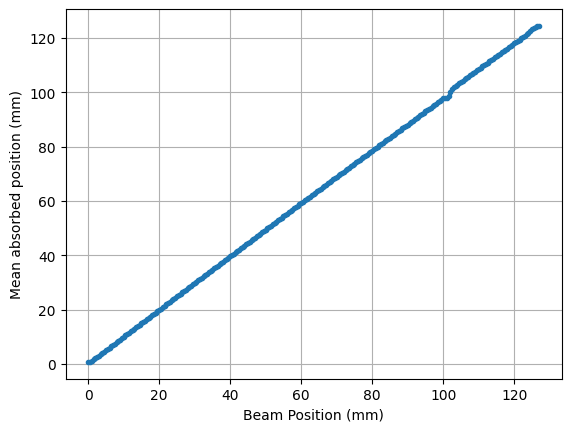

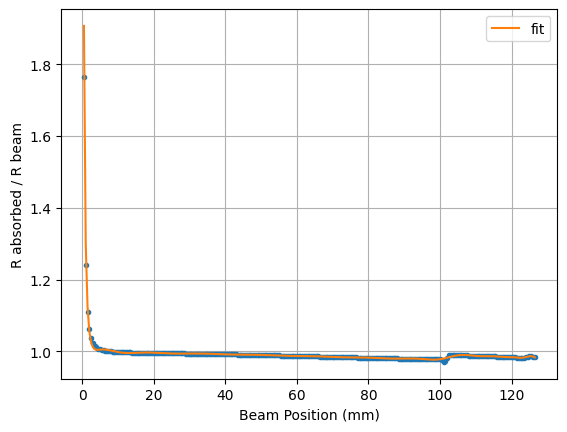

In [4]:
# We fit with polynomial the difraction
plt.figure()
plt.plot(r_beam[counts>0], r_mean[counts>0],'.')
plt.ylabel("Mean absorbed position (mm)")
plt.xlabel("Beam Position (mm)")
plt.grid()
#plt.xlim(100,128)
#plt.ylim(120,125)

rlim = 127
mask = np.logical_and(counts>0, r_beam<rlim)
z = np.polyfit(r_beam[mask],r_mean[mask], 140)
p = np.poly1d(z)

plt.figure()
plt.plot(r_beam[mask],r_mean[mask]/r_beam[mask], '.')
plt.plot(r_beam[mask], p(r_beam[mask])/r_beam[mask], label = "fit")
plt.legend()
plt.ylabel("R absorbed / R beam")
plt.xlabel("Beam Position (mm)")
#plt.ylim(0.9,1.1)
plt.grid()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_matrix(x, y, data_values, data_label, vmin=None, vmax=None):
    # Get unique coordinates and sort them
    unique_x = np.unique(x)
    unique_y = np.unique(y)
    
    # Initialize an empty grid
    data_grid = np.zeros((len(unique_y), len(unique_x)))
    
    # Populate the grid
    for i, ux in enumerate(unique_x):
        for j, uy in enumerate(unique_y):
            # Find the index matching the grid position
            idx = np.intersect1d(np.where(x == ux), np.where(y == uy))
            if idx.size > 0:
                #print(len(idx))
                data_grid[j, i] = data_values[idx[0]] #<- average, weight
    
    # Transpose the grid for correct orientation, if necessary
    #data_grid = data_grid.T    
    
    print(data_grid)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    im = plt.imshow(data_grid, extent=(unique_x.min(), unique_x.max(), unique_y.min(), unique_y.max()), origin='lower', cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    plt.colorbar(im, label=data_label)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Spatial Distribution of {data_label}')
    #plt.savefig(plotfolder+data_label+'_'+plotlabel+'_map.png',dpi=300)
    plt.show()
    
def plot_data_r(x, y, data_values, data_label, vmin=None, vmax=None):
    r = np.sqrt(x**2 + y**2)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    im = plt.plot(r, data_values)
    plt.xlabel('Distance to center (mm)')
    plt.ylabel(data_label)
    plt.ylim(vmin,vmax)
   # plt.savefig(plotfolder+data_label+'_'+plotlabel+'_distance.png',dpi=300)
    plt.show()

In [ ]:
print

In [9]:
def load_dict(filename_):
    import pickle
    with open(filename_, 'rb') as f:
        ret_di = pickle.load(f)
    return ret_di

# Define your data dictionary assuming `data` is a dictionary containing all your different data arrays


DOM_dict = load_dict("DOM_dictionary")
DOM_dict['SPEresolution']=np.array(DOM_dict["SPE_res"])
DOM_dict["Gain_PE"]=np.array(DOM_dict["gain"])/1e7
DOM_dict['TransitTime']=np.array(DOM_dict["TT"])
DOM_dict['TransitTimeSpread']=np.array(DOM_dict["TTS"])

SPE_resolution = DOM_dict['SPEresolution']
Gain_PE = DOM_dict["Gain_PE"]
TransitTimeSpread = DOM_dict['TransitTimeSpread']
TransitTime = DOM_dict['TransitTime']
mydata = {
    'SPEresolution': SPE_resolution,
    'Gain_PE': Gain_PE,
    'TransitTimeSpread': TransitTimeSpread,
    'TransitTime': TransitTime
}


# Filter DOM_dict to only keep keys that are present in mydata
DOM_dict = {key: DOM_dict[key] for key in mydata.keys() if key in DOM_dict}

print(DOM_dict.keys())
mydata = DOM_dict

dict_keys(['SPEresolution', 'Gain_PE', 'TransitTimeSpread', 'TransitTime'])


In [13]:

bounds = {
    "SPEresolution" : {"posdef" : True, "min" : 0.1, "max" : 0.9},
    "Gain" : {"posdef" : True, "min" : 0.6, "max" : 1.3},
    "TransitTimeSpread" : {"posdef" : True, "min" : 0.5 , "max" :5.0},
    "TransitTime" : {"posdef" : False, "min": -2 , "max" :13}
}
plotlimits = []
for key, value in bounds.items():
    plotlimits.append([value['min'], value['max']])

In [11]:
for i, (key, values) in enumerate(mydata.items()):
    plot_data_matrix(x, y, values, key, vmin=plotlimits[i][0], vmax=plotlimits[i][1]) 
    plot_data_r(x, y, values, key, vmin=plotlimits[i][0], vmax=plotlimits[i][1])

NameError: name 'x' is not defined

In [133]:
import os
measurementpath = '/HDD/fvaracar/Geant_082024/OMSim_local/OMSim/OMSim/common/data/PMTs/measurement_matching_data/scans/pDOM'
if not os.path.exists(measurementpath):
    os.mkdir(measurementpath)
   
# Loop through the items in the data dictionary
for data_key, data_values in mydata.items():
    # Set the file path
    file_path = os.path.join(measurementpath, f"{data_key}_459.dat")
    
    # Write data to file
    with open(file_path, 'w') as file:
        for xi, yi, vl in zip(x, y, data_values):
            file.write(f"{round(xi,2)}\t{round(yi,2)}\t{vl}\n")

print("Data files are successfully saved.")

Data files are successfully saved.


In [154]:
import os

measurementpath = '/HDD/fvaracar/Geant_082024/OMSim_local/OMSim/OMSim/common/data/PMTs/measurement_matching_data/scans/pDOM'
if not os.path.exists(measurementpath):
    os.mkdir(measurementpath)

# Loop through the items in the data dictionary
for data_key, data_values in mydata.items():
    # Set the file path
    file_path = os.path.join(measurementpath, f"{data_key}_459.dat")
    
    # Write data to file
    with open(file_path, 'w') as file:
        for xi, yi, vl in zip(x, y, data_values):
            # Explicitly use tab '\t' as the separator
            file.write(f"{xi:.2f}\t{yi:.2f}\t{vl}\n")

print("Data files are successfully saved.")


Data files are successfully saved.


/tmp/ipykernel_1205343/721525191.py:39: RuntimeWarning: divide by zero encountered in divide
  factor = Rs/R


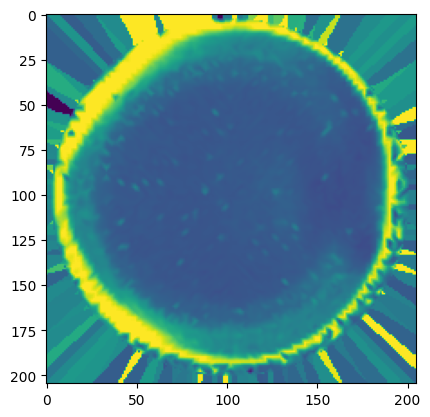

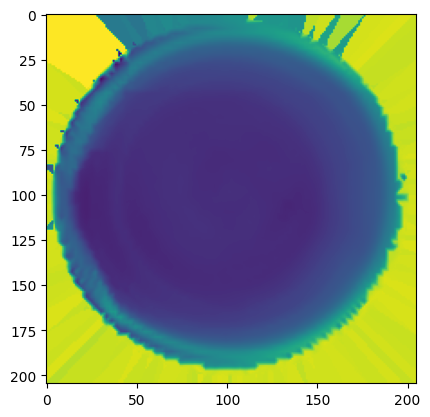

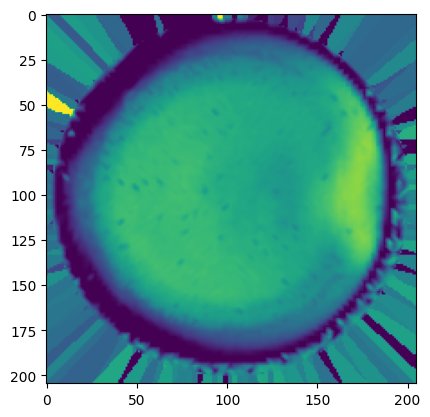

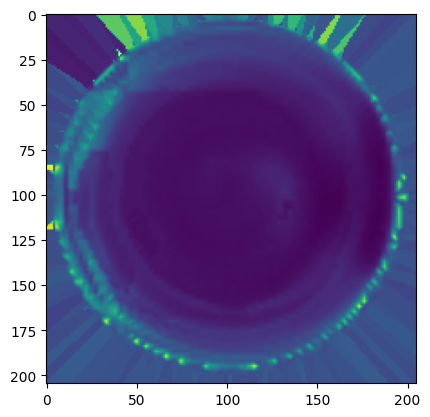

In [12]:
class LinearNDInterpolatorExt(object):
    def __init__(self, points,values):
        self.funcinterp=scipy.interpolate.LinearNDInterpolator(points,values)
        self.funcnearest=scipy.interpolate.NearestNDInterpolator(points,values)
    def __call__(self,*args):
        t=self.funcinterp(*args)
        if not numpy.isnan(t):
            return t.item(0)
        else:
            return self.funcnearest(*args)

bounds = {
    "SPEresolution" : {"posdef" : True, "min" : 0.1, "max" : 0.9},
    "Gain" : {"posdef" : True, "min" : 0.6, "max" : 1.3},
    "TransitTimeSpread" : {"posdef" : True, "min" : 0.5 , "max" :5.0},
    "TransitTime" : {"posdef" : False, "min": -2 , "max" :13}
}

def CheckValue(key, val):
    if bounds[key]["posdef"]:
        val = abs(val)
    if val < bounds[key]["min"]:
        val = bounds[key]["min"]
    if val > bounds[key]["max"]:
        val = bounds[key]["max"]
    return val
    
def scaleXY(polynome, fname):
    x, y, vals = np.loadtxt(f"original/{fname}", unpack=1)
    
    R = np.sqrt(x**2+y**2)
    mask = R <= 127
    
    x = x[mask]
    y = y[mask]
    vals = vals[mask]
    R = R[mask]
    Rs = polynome(R)
    factor = Rs/R
    
    for i, f in enumerate(factor):
        if f==0. or np.isnan(f) or np.isinf(f):
            factor[i] = 1.
    
    key = fname.split("_")[0]

    x *= factor
    y *= factor
    for i,val in enumerate(vals):
        vals[i] = CheckValue(key, val)
    finterp = LinearNDInterpolatorExt((x,y), vals)
    step = 1.25
    
    # here put a number a bit larger than the maximal R possible in the simulation, for example mDOM PMT jEllipseXYaxis =37.8704
    xx = np.arange(-127, 127+step, step) 
    vals_interpolated = []
    xinterp = []
    yinterp = []
    rs = []
    matrix = np.zeros((xx.size,xx.size))
    for i,xi in enumerate(xx):
        for j,yi in enumerate(xx):
            svl = finterp(xi, yi)
            vals_interpolated.append(svl)
            matrix[i][j]= svl
            rs.append(np.sqrt(xi**2+yi**2))
            xinterp.append(xi)
            yinterp.append(yi)
            
    vals_interpolated = np.array(vals_interpolated)
    xinterp = np.array(xinterp)
    yinterp = np.array(yinterp)
    plt.figure()
    plt.imshow(matrix)
    with open(f"/HDD/fvaracar/Geant_082024/OMSim_local/OMSim/OMSim/common/data/PMTs/measurement_matching_data/scans/pDOM/{fname}", "w") as file:
        for xi, yi, vali in zip(xinterp, yinterp, vals_interpolated):
            vl = CheckValue(key, vali)
            file.write(f"{round(xi,2)}\t{round(yi,2)}\t{vl}\n")
            
    return R,factor

for file in glob.glob("original/*"):
    try:
        R,fctor = scaleXY(p, file.split("/")[-1])
        
    except Exception as err:
        print(file, err)

In [5]:
import numpy as np
x,y,_,gain,spe_res,transit_time,TTS,_ = np.loadtxt("/HDD/fvaracar/Geant_082024/OMSim_local/OMSim/OMSim/build/step5.dat", unpack=1)

(-127.0, 127.0)

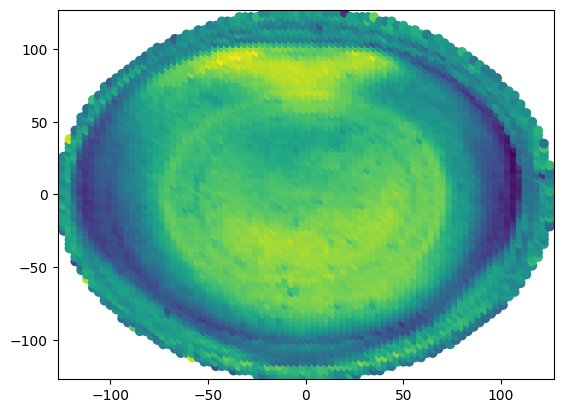

In [6]:
plt.figure()
plt.scatter(x,y,c=gain)
plt.xlim(-127,127)
plt.ylim(-127,127)

(-127.0, 127.0)

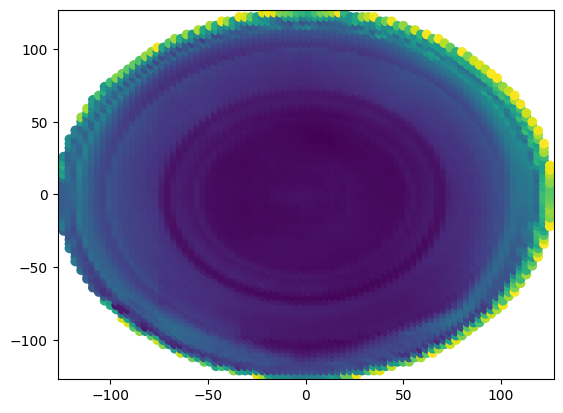

In [7]:
plt.figure()
plt.scatter(x,y,c=transit_time)
plt.xlim(-127,127)
plt.ylim(-127,127)

(-127.0, 127.0)

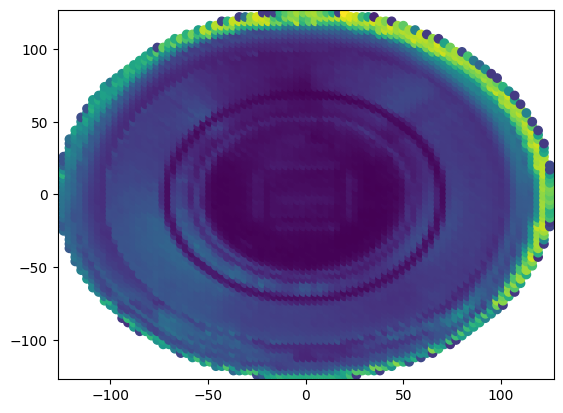

In [8]:
plt.figure()
plt.scatter(x,y,c=TTS)
plt.xlim(-127,127)
plt.ylim(-127,127)